/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1
W = [[0.00146676]]
b = [[0.]]
Some elements of output vector Y_hat: [ 1.42254074e-03 -1.75626384e-03 -2.22383585e-03  7.63444043e-05
  5.78170775e-04]
cost = 0.49885374000762966
dW = [[-0.78075766]]
db = [[1.95399252e-16]]
W updated = [[0.93837596]]
b updated = [[-2.34479103e-16]]
Cost after iteration 0: 0.511362
Cost after iteration 1: 0.206754
Cost after iteration 2: 0.194570
Cost after iteration 3: 0.194083
Cost after iteration 4: 0.194063
Cost after iteration 5: 0.194063
Cost after iteration 6: 0.194062
Cost after iteration 7: 0.194062
Cost after iteration 8: 0.194062
Cost after iteration 9: 0.194062
Cost after iteration 10: 0.194062
Cost after iteration 11: 0.194062
Cost after iteration 12: 0.194062
Cost after iteration 13: 0.194062
Cost after iteration 14: 0.194062
Cost after iteration 15: 0.194062
Cost after iteration 16: 0.194062
Cost after iteration 17: 0.194062
Cost after iteration 18: 0.194062
C

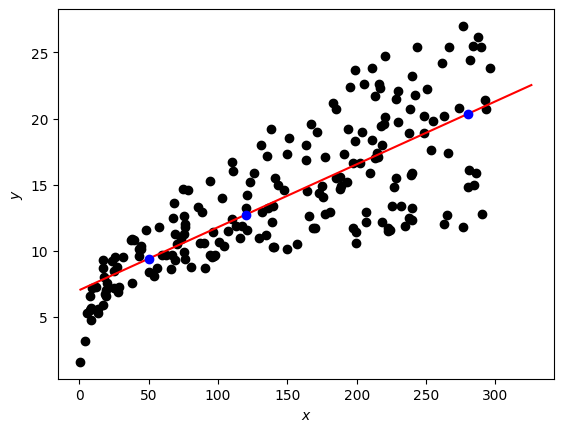

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = "tvmarketing.csv"
adv = pd.read_csv(data)

# Display the first few rows of the dataset
adv.head()

# Normalize the features using mean normalization
adv_norm = (adv - np.mean(adv)) / np.std(adv)
X_norm = adv_norm['TV']
Y_norm = adv_norm['Sales']

# Reshape the features and labels
X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

# Function to determine layer sizes
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return (n_x, n_y)

# Get the sizes of the input and output layers
(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

# Initialize parameters for the neural network
def initialize_parameters(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    parameters = {"W": W, "b": b}
    return parameters

# Display initialized parameters
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

# Forward propagation to calculate predictions
def forward_propagation(X, parameters):
    W = parameters["W"]
    b = parameters["b"]
    Z = np.matmul(W, X) + b
    Y_hat = Z
    return Y_hat

# Get predictions using forward propagation
Y_hat = forward_propagation(X_norm, parameters)
print("Some elements of output vector Y_hat:", Y_hat[0, 0:5])

# Compute the cost function
def compute_cost(Y_hat, Y):
    m = Y_hat.shape[1]
    cost = np.sum((Y_hat - Y)**2) / (2 * m)
    return cost

# Display the cost
print("cost = " + str(compute_cost(Y_hat, Y_norm)))

# Backward propagation to calculate gradients
def backward_propagation(Y_hat, X, Y):
    m = X.shape[1]
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    grads = {"dW": dW, "db": db}
    return grads

# Display calculated gradients
grads = backward_propagation(Y_hat, X_norm, Y_norm)
print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

# Update parameters using gradient descent
def update_parameters(parameters, grads, learning_rate=1.2):
    W = parameters["W"]
    b = parameters["b"]
    dW = grads["dW"]
    db = grads["db"]
    W = W - learning_rate * dW
    b = b - learning_rate * db
    parameters = {"W": W, "b": b}
    return parameters

# Display updated parameters
parameters_updated = update_parameters(parameters, grads)
print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

# Neural network model training function
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    parameters = initialize_parameters(n_x, n_y)

    # Loop for training iterations
    for i in range(0, num_iterations):
        Y_hat = forward_propagation(X, parameters)
        cost = compute_cost(Y_hat, Y)
        grads = backward_propagation(Y_hat, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost for every iteration
        if print_cost:
            print("Cost after iteration %i: %f" % (i, cost))

    return parameters

# Train the neural network model
parameters_simple = nn_model(X_norm, Y_norm, num_iterations=30, learning_rate=1.2, print_cost=True)

# Prediction function
def predict(X, Y, parameters, X_pred):
    W = parameters["W"]
    b = parameters["b"]

    # Normalize the input data for prediction
    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean) / X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]), 1))
        X_std = np.array(np.std(X)).reshape((len(X.axes[1]), 1))
        X_pred_norm = ((X_pred - X_mean) / X_std)

    # Make predictions
    Y_pred_norm = np.matmul(W, X_pred_norm) + b
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    return Y_pred[0]

# Example predictions
X_pred = np.array([50, 120, 280])
Y_pred = predict(adv["TV"], adv["Sales"], parameters_simple, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")
fig, ax = plt.subplots()
plt.scatter(adv["TV"], adv["Sales"], color="black")
plt.xlabel("$x$")
plt.ylabel("$y$")
X_line = np.arange(np.min(adv["TV"]), np.max(adv["TV"]) * 1.1, 0.1)
Y_line = predict(adv["TV"], adv["Sales"], parameters_simple, X_line)
ax.plot(X_line, Y_line, "r")
ax.plot(X_pred, Y_pred, "bo")
plt.plot()
plt.show()
